In [179]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)

In [180]:
df = pd.read_csv("CreditScoreData.csv")
df.iloc[0]

ID                                                    0x160f
Customer_ID                                       CUS_0x21b1
Month                                               February
Name                                         Rick Rothackerj
Age                                                       28
SSN                                              004-07-5839
Occupation                                           Teacher
Annual_Income                                        34,848 
Monthly_Inhand_Salary                                 3,038 
Num_Bank_Accounts                                          2
Num_Credit_Card                                            4
Interest_Rate                                              6
Num_of_Loan                                                1
Type_of_Loan                             Credit-Builder Loan
Delay_from_due_date                                        7
Num_of_Delayed_Payment                                     1
Changed_Credit_Limit    

In [181]:
df.shape

(23929, 28)

In [182]:
df.nunique()

ID                           23929
Customer_ID                  10712
Month                            8
Name                          8934
Age                             43
SSN                          10712
Occupation                      15
Annual_Income                10165
Monthly_Inhand_Salary         6153
Num_Bank_Accounts               10
Num_Credit_Card                 10
Interest_Rate                   39
Num_of_Loan                     10
Type_of_Loan                  5629
Delay_from_due_date             68
Num_of_Delayed_Payment         226
Changed_Credit_Limit          3008
Num_Credit_Inquiries           379
Credit_Mix                       3
Outstanding_Debt             10502
Credit_Utilization_Ratio      2189
Credit_History_Age_Months      403
Payment_of_Min_Amount            2
Total_EMI_per_month           8694
Amount_invested_monthly      17252
Payment_Behaviour                6
Monthly_Balance              18835
Credit_Score                     3
dtype: int64

In [183]:
df.describe().T
#max values of Num of Delayed Payment and Num Credit Inquiries are unreasonably large which can indicate outliers

,count,mean,std,min,25%,50%,75%,max
Age,23929.0,33.079318,10.754151,14.00,24.00,33.00,41.00,56.00
Num_Bank_Accounts,23929.0,5.647541,2.361770,1.00,4.00,6.00,8.00,10.00
Num_Credit_Card,23929.0,5.611058,2.051159,1.00,4.00,6.00,7.00,10.00
Interest_Rate,23929.0,15.038196,8.766724,1.00,8.00,14.00,20.00,76.00
Num_of_Loan,23929.0,3.621965,2.450192,0.00,2.00,3.00,5.00,9.00
Delay_from_due_date,23929.0,21.853483,14.862409,0.00,11.00,19.00,29.00,67.00
Num_of_Delayed_Payment,23929.0,32.564294,235.619725,0.00,9.00,14.00,19.00,4397.00
Changed_Credit_Limit,23929.0,10.724694,6.846783,-6.44,5.68,9.69,15.34,36.29
Num_Credit_Inquiries,23929.0,26.874253,186.092299,0.00,3.00,6.00,9.00,2594.00
Credit_Utilization_Ratio,23929.0,32.308787,5.067189,20.88,28.13,32.37,36.49,49.56


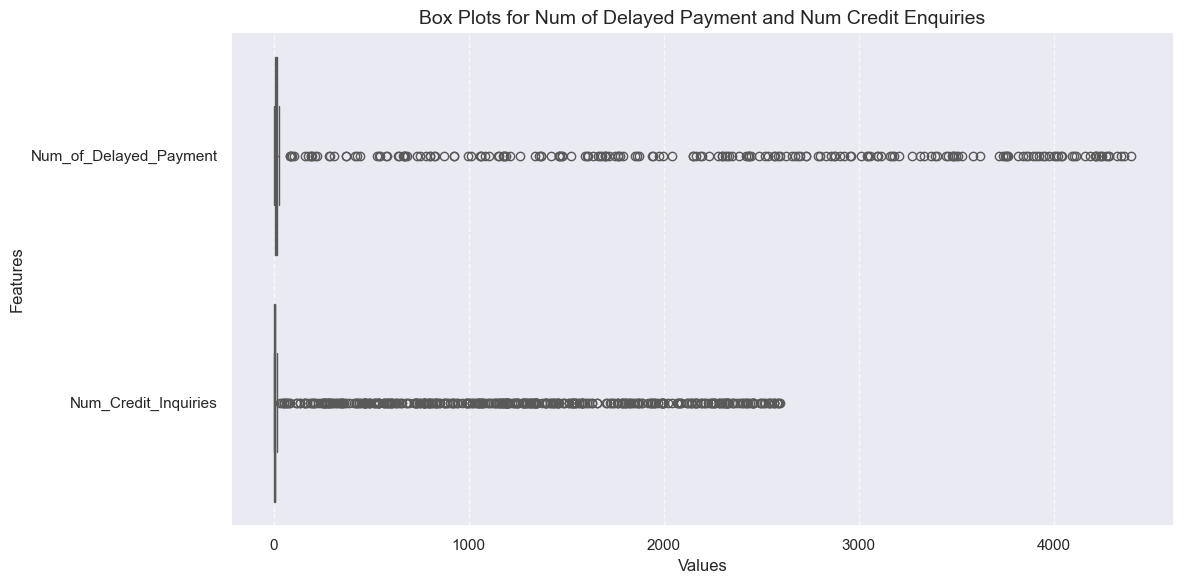

In [184]:
#box plots for the two features

plt.figure(figsize=(12, 6))


sns.boxplot(data=df[['Num_of_Delayed_Payment', 'Num_Credit_Inquiries']], orient='h', palette='Set2')


plt.title('Box Plots for Num of Delayed Payment and Num Credit Enquiries', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#too many outliers in both fields

In [185]:
pd.set_option('display.max_rows', None) 
print(df['Num_Credit_Inquiries'].value_counts())
pd.reset_option('display.max_rows')
#<60 reasonable value for credit inquiries

Num_Credit_Inquiries
4       2680
6       2054
3       2031
7       2029
8       1992
2       1857
1       1696
0       1580
5       1446
9       1353
11      1330
10      1266
12      1148
13       396
14       274
15       229
16       116
17        58
285        3
769        3
538        2
1786       2
2323       2
732        2
53         2
1768       2
876        2
796        2
424        2
1433       2
1133       2
1991       2
1460       2
2091       2
1288       2
1175       2
1483       2
2285       2
1582       2
1278       2
987        2
2458       2
2161       2
1189       2
1347       2
1393       2
1203       2
568        2
1890       2
1000       1
1179       1
1988       1
2390       1
586        1
473        1
1114       1
1168       1
1545       1
2290       1
1004       1
1855       1
685        1
1829       1
2537       1
1046       1
2001       1
1086       1
342        1
1633       1
2297       1
1126       1
1155       1
678        1
1167       1
603        1
1429

In [186]:
pd.set_option('display.max_rows', None)  # Show all rows
print(df['Num_of_Delayed_Payment'].value_counts())
pd.reset_option('display.max_rows')
#<50 seems reasonable

Num_of_Delayed_Payment
19      1473
17      1471
18      1440
16      1437
20      1429
10      1411
15      1406
12      1264
8       1260
11      1251
9       1191
14      1082
13      1081
21       701
22       648
7        562
6        535
23       529
5        487
24       472
25       452
4        429
3        407
2        392
1        370
0        361
26        81
27        73
28        33
1463       2
1370       2
192        2
2438       2
4249       1
2729       1
107        1
2873       1
2879       1
223        1
1181       1
1750       1
2334       1
3099       1
309        1
2431       1
662        1
1976       1
3060       1
4278       1
3955       1
371        1
1061       1
3909       1
3171       1
683        1
2924       1
800        1
1636       1
195        1
4397       1
2148       1
1178       1
2044       1
1211       1
3162       1
2728       1
4185       1
3447       1
1154       1
1852       1
577        1
2351       1
3869       1
3208       1
2521       1
58

In [187]:
#drop the rows where the two fields exceed the limits
rows = df[(df['Num_of_Delayed_Payment'] > 50) | (df['Num_Credit_Inquiries'] > 60)].index

df.drop(rows, inplace=True)
df.nunique()

ID                           23340
Customer_ID                  10627
Month                            8
Name                          8881
Age                             43
SSN                          10627
Occupation                      15
Annual_Income                10088
Monthly_Inhand_Salary         6129
Num_Bank_Accounts               10
Num_Credit_Card                 10
Interest_Rate                   39
Num_of_Loan                     10
Type_of_Loan                  5595
Delay_from_due_date             68
Num_of_Delayed_Payment          29
Changed_Credit_Limit          2995
Num_Credit_Inquiries            22
Credit_Mix                       3
Outstanding_Debt             10420
Credit_Utilization_Ratio      2182
Credit_History_Age_Months      403
Payment_of_Min_Amount            2
Total_EMI_per_month           8623
Amount_invested_monthly      16935
Payment_Behaviour                6
Monthly_Balance              18477
Credit_Score                     3
dtype: int64

In [188]:
print(df.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 2462
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age_Months       0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64


In [189]:
print(df.duplicated().sum())

0


In [190]:
df.describe(include="object").T

,count,unique,top,freq
ID,23340,23340,0x160f,1
Customer_ID,23340,10627,CUS_0x82b,7
Month,23340,8,March,2956
Name,23340,8881,Deepa Seetharamanm,17
SSN,23340,10627,468-43-3883,7
Occupation,23340,15,Lawyer,1649
Annual_Income,23340,10088,"15,383",12
Monthly_Inhand_Salary,23340,6129,"1,545",25
Type_of_Loan,20878,5595,Not Specified,336
Credit_Mix,23340,3,Standard,11350


In [191]:
df.dtypes

ID                            object
Customer_ID                   object
Month                         object
Name                          object
Age                            int64
SSN                           object
Occupation                    object
Annual_Income                 object
Monthly_Inhand_Salary         object
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                    int64
Type_of_Loan                  object
Delay_from_due_date            int64
Num_of_Delayed_Payment         int64
Changed_Credit_Limit         float64
Num_Credit_Inquiries           int64
Credit_Mix                    object
Outstanding_Debt              object
Credit_Utilization_Ratio     float64
Credit_History_Age_Months      int64
Payment_of_Min_Amount         object
Total_EMI_per_month           object
Amount_invested_monthly       object
Payment_Behaviour             object
Monthly_Balance               object
C

In [192]:
#checking why certain columns are not numeric
df[pd.to_numeric(df['Annual_Income'], errors='coerce').isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,"34,848","3,038",2,4,6,1,Credit-Builder Loan,7,1,7.42,2,Good,605.03,38.55,320,No,18.82,40.39,High_spent_Large_value_payments,484.59,Good
1,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,"34,848","3,038",2,4,6,1,Credit-Builder Loan,3,1,6.42,2,Good,605.03,34.98,323,No,18.82,130.12,Low_spent_Small_value_payments,444.87,Good
2,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,"34,848","3,038",2,4,6,1,Credit-Builder Loan,3,0,5.42,2,Good,605.03,33.38,324,No,18.82,43.48,High_spent_Large_value_payments,481.51,Good
3,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,"34,848","3,038",2,4,6,1,Credit-Builder Loan,3,4,5.42,2,Good,605.03,32.93,326,No,18.82,218.90,Low_spent_Small_value_payments,356.08,Good
4,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,"30,690","2,612",2,5,4,1,Not Specified,0,6,1.99,4,Good,632.46,26.54,207,No,16.42,81.23,Low_spent_Large_value_payments,433.60,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23924,0x25faf,CUS_0x2084,June,Ryanl,21,253-72-7758,Architect,"38,321","3,107",4,4,3,4,"Student Loan, Debt Consolidation Loan, Student...",11,7,1.59,3,Good,678.57,37.37,208,No,362.07,26.70,High_spent_Large_value_payments,434.47,Standard
23925,0x25fce,CUS_0xaf61,January,Chris Wickhamm,49,133-16-7738,Writer,"37,188","3,097",1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,12,5.38,3,Good,620.64,39.08,357,No,84.21,223.88,Low_spent_Small_value_payments,291.62,Good
23926,0x25fcf,CUS_0xaf61,February,Chris Wickhamm,49,133-16-7738,Writer,"37,188","3,097",1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,12,5.38,3,Good,620.64,32.80,358,No,84.21,70.87,High_spent_Large_value_payments,394.62,Good
23927,0x25fd1,CUS_0xaf61,April,Chris Wickhamm,49,133-16-7738,Writer,"37,188","3,097",1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",3,12,5.38,3,Good,620.64,36.98,360,No,84.21,215.49,Low_spent_Small_value_payments,300.01,Good


In [193]:
#removing the commas in those columns
columns = ['Outstanding_Debt','Annual_Income', 'Monthly_Inhand_Salary','Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
for column in columns:
    df[column] = pd.to_numeric(df[column].str.replace(',', ''))

df.dtypes

ID                            object
Customer_ID                   object
Month                         object
Name                          object
Age                            int64
SSN                           object
Occupation                    object
Annual_Income                  int64
Monthly_Inhand_Salary          int64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                    int64
Type_of_Loan                  object
Delay_from_due_date            int64
Num_of_Delayed_Payment         int64
Changed_Credit_Limit         float64
Num_Credit_Inquiries           int64
Credit_Mix                    object
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age_Months      int64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour             object
Monthly_Balance              float64
C

In [194]:
#drop the columns that are not useful
df.drop(['ID','Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Age', 'Num_Bank_Accounts'], axis=1, inplace=True)

In [195]:
df['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                          336
Credit-Builder Loan                                                                                                                    295
Personal Loan                                                                                                                          295
Student Loan                                                                                                                           290
Debt Consolidation Loan                                                                                                                285
                                                                                                                                      ... 
Personal Loan, Auto Loan, Debt Consolidation Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, and Not Specified                1
Personal Loan,

In [196]:
df[df['Type_of_Loan'].isnull()].shape

(2462, 20)

In [197]:
df[(df['Num_of_Loan'] == 0) & (df['Type_of_Loan'].isnull())].shape

(2462, 20)

In [198]:
df[df['Num_of_Loan']==0].shape

(2462, 20)

In [199]:
#handling of the messy data in Type_of_Loan
#the column has comma separated loan types that make over five thousand combinations in the dataset; null values (no loan) are mixed in as well

#Replacing the null values with "No Loan"
#df['Type_of_Loan'] = df['Type_of_Loan'].fillna('No Loan')
def loan_ohe(data):
    #replace the NaN values with "No Loan" label
    data['Type_of_Loan'] = data['Type_of_Loan'].replace(np.nan, 'No Loan')

    
    #trim down the "and"s and spaces between loan combinations
    for index, loan_types in data["Type_of_Loan"].items():
        loan_types = loan_types.replace(", and", ",").replace(", ", ",")
        data.at[index, 'Type_of_Loan']= loan_types

    #create a list for unique loans

    loan_types=[]
    loans=data["Type_of_Loan"].unique()

    for loan in loans:
        unique_loans=loan.split(",")
        for unique_loan in unique_loans:
            if unique_loan not in loan_types:
                loan_types.append(unique_loan)

    #create a new column for every unqiue loan with count
    for loan_type in loan_types:
        data[loan_type] = data['Type_of_Loan'].apply(lambda x: x.count(loan_type))
    #remove the original column and no of loans
    data.drop(["Type_of_Loan", "Num_of_Loan"], inplace=True, axis=1)

    return data

df= loan_ohe(df)

In [200]:
df.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit-Builder Loan,Not Specified,No Loan,Personal Loan,Debt Consolidation Loan,Auto Loan,Payday Loan,Student Loan,Home Equity Loan,Mortgage Loan
0,34848,3038,4,6,7,1,7.42,2,Good,605.03,38.55,320,No,18.82,40.39,High_spent_Large_value_payments,484.59,Good,1,0,0,0,0,0,0,0,0,0
1,34848,3038,4,6,3,1,6.42,2,Good,605.03,34.98,323,No,18.82,130.12,Low_spent_Small_value_payments,444.87,Good,1,0,0,0,0,0,0,0,0,0
2,34848,3038,4,6,3,0,5.42,2,Good,605.03,33.38,324,No,18.82,43.48,High_spent_Large_value_payments,481.51,Good,1,0,0,0,0,0,0,0,0,0
3,34848,3038,4,6,3,4,5.42,2,Good,605.03,32.93,326,No,18.82,218.90,Low_spent_Small_value_payments,356.08,Good,1,0,0,0,0,0,0,0,0,0
4,30690,2612,5,4,0,6,1.99,4,Good,632.46,26.54,207,No,16.42,81.23,Low_spent_Large_value_payments,433.60,Standard,0,1,0,0,0,0,0,0,0,0


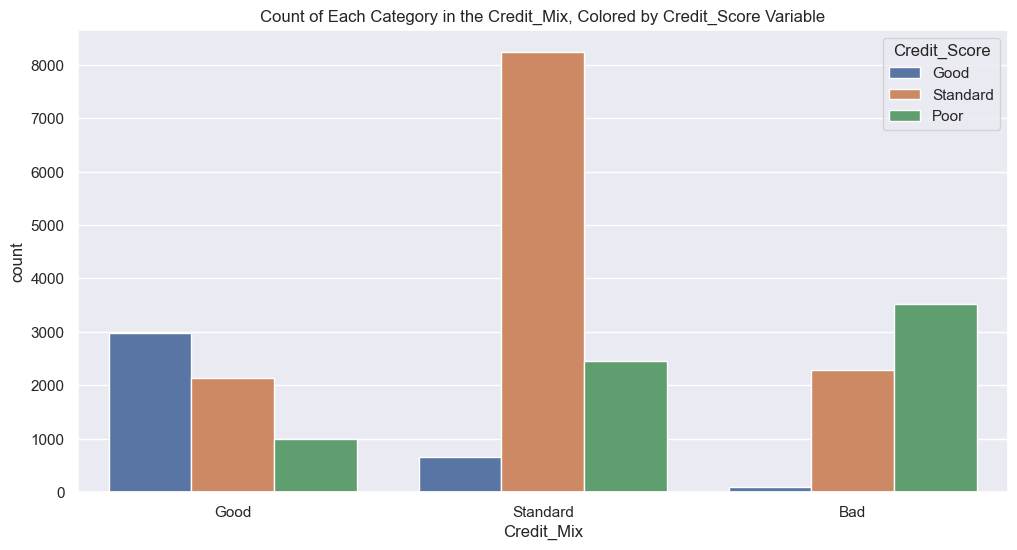

In [201]:
#distribution of credit_mix compared in regards to credit score
#indicative of positive correlation

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='Credit_Mix', hue='Credit_Score', data=df)

plt.title('Count of Each Category in the Credit_Mix, Colored by Credit_Score Variable')
plt.show()

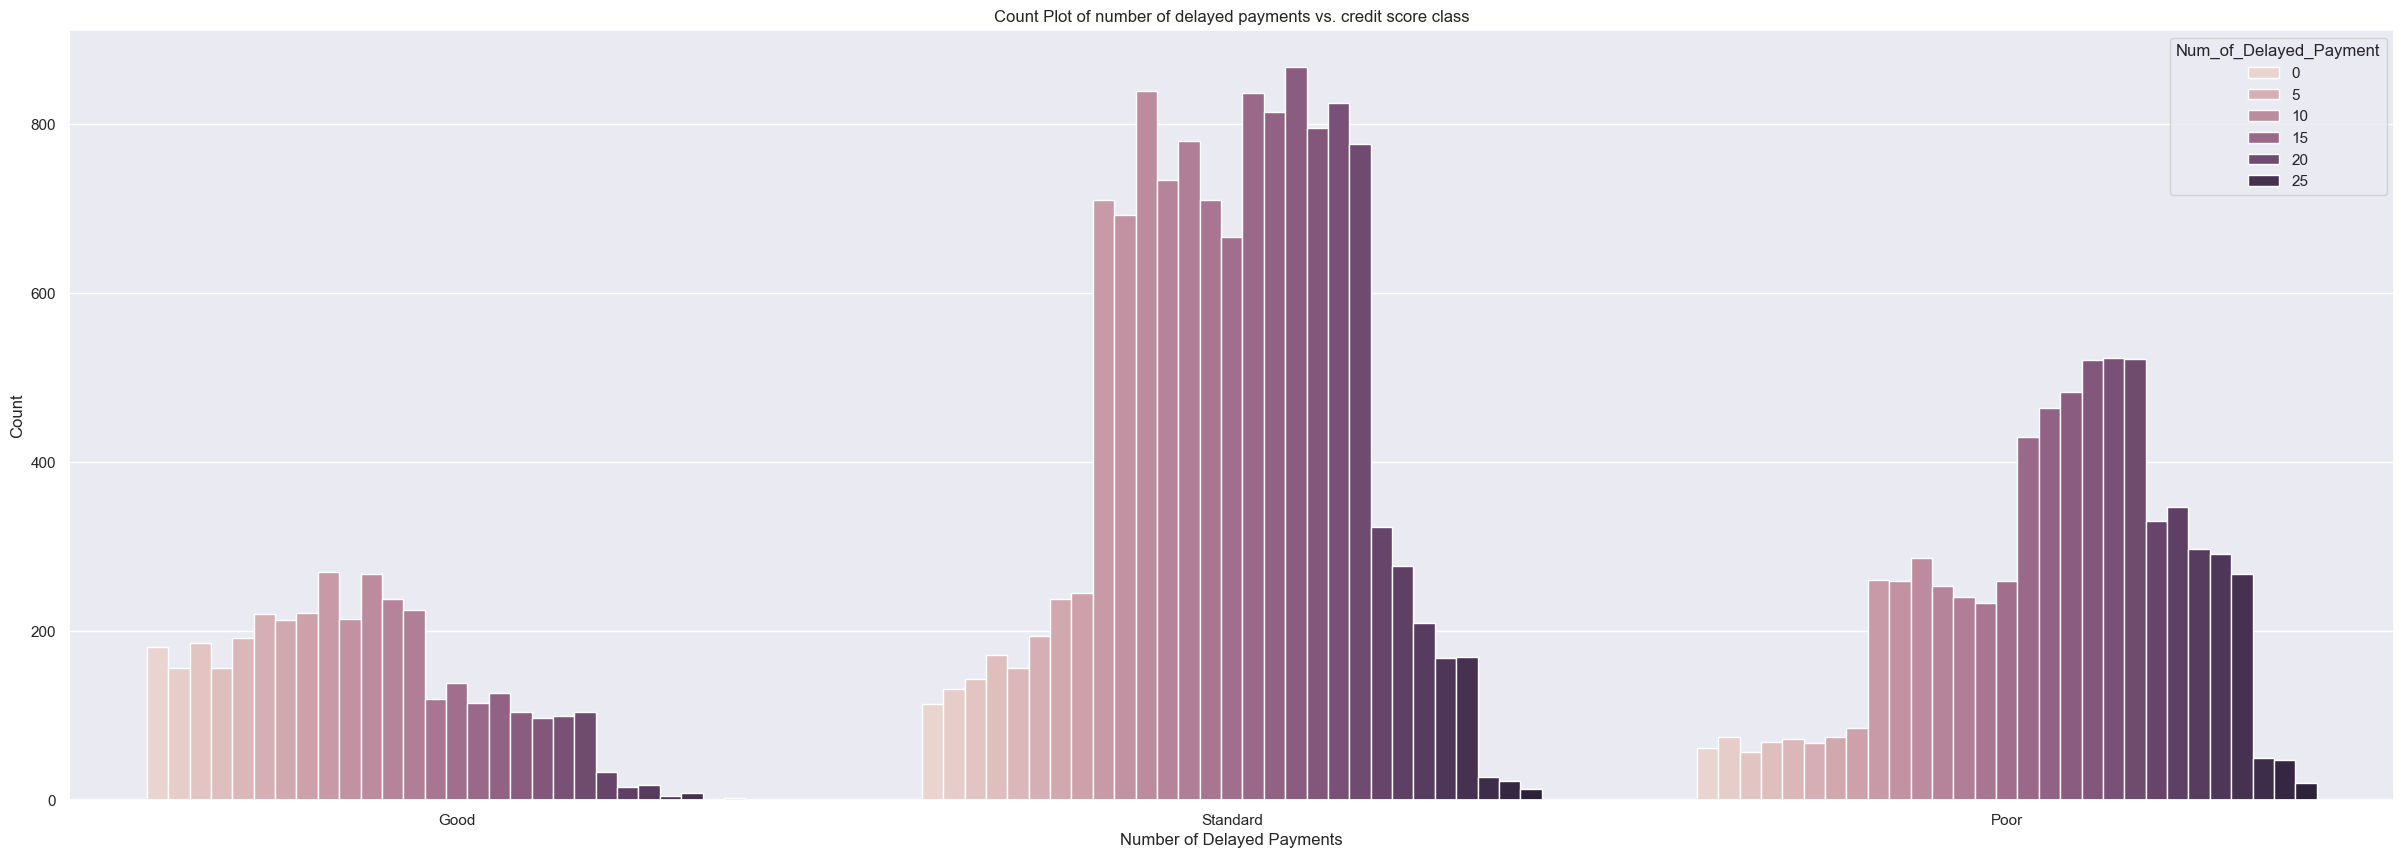

In [202]:
plt.figure(figsize=(30, 10))
sns.countplot(hue='Num_of_Delayed_Payment', x='Credit_Score', data=df)

plt.title('Count Plot of number of delayed payments vs. credit score class')
plt.xlabel('Number of Delayed Payments')
plt.ylabel('Count')
plt.show()

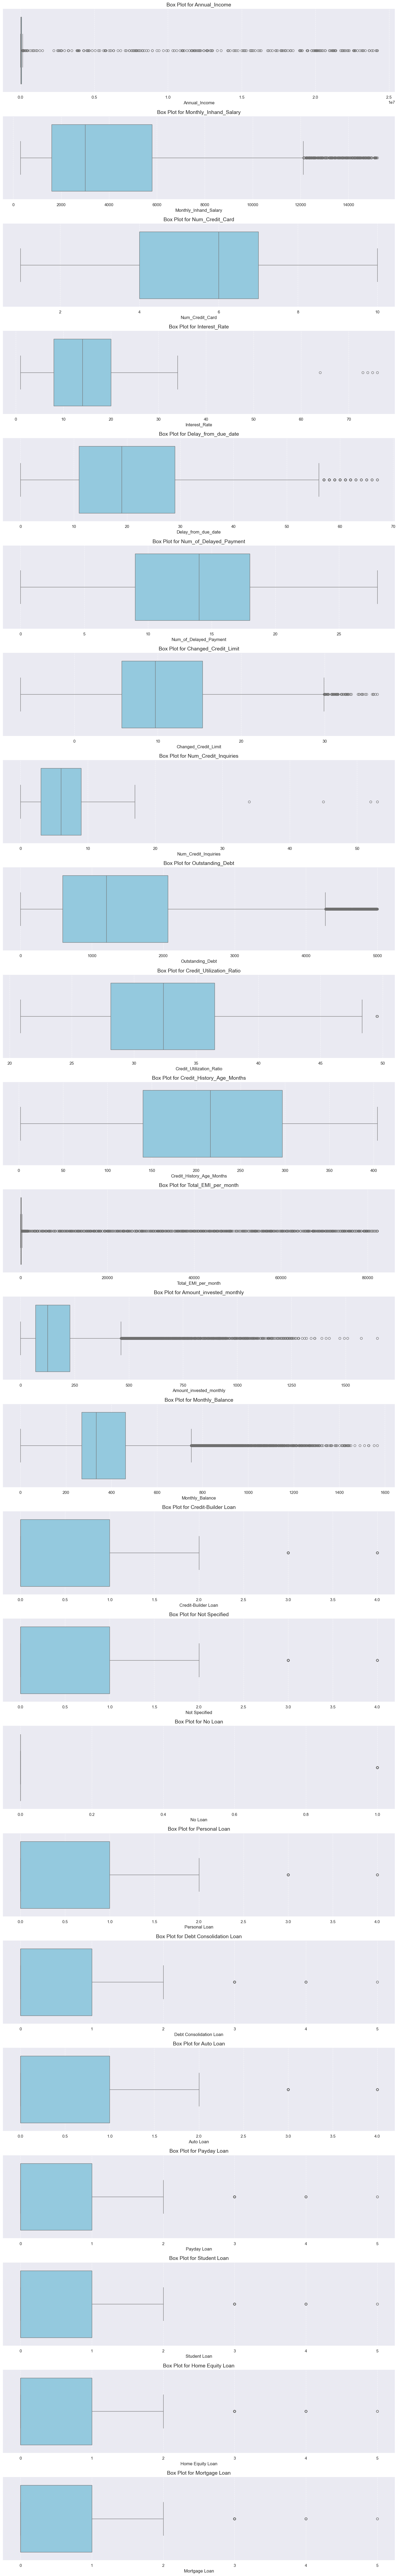

In [203]:
#box plots for all numeric features for final visualization

numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, len(numeric_features) * 4))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 1, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot for {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#EMI per month and Annual income have multitude of anomalies but they can be assumed authenic anomalies
#EMI refers to Equated Monthly Installment- a fixed payment made by a borrower to a lender on a specified date of each month

In [204]:
#normalization
# Convert the credit_mix column to numerical values
df['Credit_Mix'] = df['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

# Convert the payment_of_min_amount column to numerical values
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'Yes': 1, 'No': 0})

#Convert the credit socre into numerical values
df['Credit_Score'] = df['Credit_Score'].map({'Good': 2, 'Standard': 1, 'Poor': 0})

In [205]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].map({
    'High_spent_Large_value_payments': 6,
    'High_spent_Medium_value_payments': 5, 
    'High_spent_Small_value_payments': 4,
    'Low_spent_Large_value_payments': 3, 
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Small_value_payments': 1
})

df.dtypes

Annual_Income                  int64
Monthly_Inhand_Salary          int64
Num_Credit_Card                int64
Interest_Rate                  int64
Delay_from_due_date            int64
Num_of_Delayed_Payment         int64
Changed_Credit_Limit         float64
Num_Credit_Inquiries           int64
Credit_Mix                     int64
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age_Months      int64
Payment_of_Min_Amount          int64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour              int64
Monthly_Balance              float64
Credit_Score                   int64
Credit-Builder Loan            int64
Not Specified                  int64
No Loan                        int64
Personal Loan                  int64
Debt Consolidation Loan        int64
Auto Loan                      int64
Payday Loan                    int64
Student Loan                   int64
Home Equity Loan               int64
M

In [206]:
#normalizing the data using minmax scaler
scaler = MinMaxScaler()
columns = df.columns.tolist()
columns.remove("Credit_Score")

for column in columns:
    df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))

In [207]:
df

,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit-Builder Loan,Not Specified,No Loan,Personal Loan,Debt Consolidation Loan,Auto Loan,Payday Loan,Student Loan,Home Equity Loan,Mortgage Loan
0,0.001151,0.183478,0.333333,0.066667,0.104478,0.035714,0.324362,0.037736,1.0,0.120993,0.616109,0.791045,0.0,0.000229,0.024532,1.0,0.309126,2,0.25,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1,0.001151,0.183478,0.333333,0.066667,0.044776,0.035714,0.300960,0.037736,1.0,0.120993,0.491632,0.798507,0.0,0.000229,0.079034,0.0,0.283764,2,0.25,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2,0.001151,0.183478,0.333333,0.066667,0.044776,0.000000,0.277557,0.037736,1.0,0.120993,0.435844,0.800995,0.0,0.000229,0.026409,1.0,0.307159,2,0.25,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
3,0.001151,0.183478,0.333333,0.066667,0.044776,0.142857,0.277557,0.037736,1.0,0.120993,0.420153,0.805970,0.0,0.000229,0.132958,0.0,0.227071,2,0.25,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
4,0.000979,0.154889,0.444444,0.040000,0.000000,0.214286,0.197285,0.075472,1.0,0.126481,0.197350,0.509950,0.0,0.000200,0.049338,0.4,0.276568,1,0.00,0.25,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23924,0.001294,0.188108,0.333333,0.026667,0.164179,0.250000,0.187924,0.056604,1.0,0.135708,0.574965,0.512438,0.0,0.004405,0.016217,1.0,0.277124,1,0.00,0.00,0.0,0.00,0.2,0.00,0.0,0.4,0.0,0.2
23925,0.001248,0.187437,0.333333,0.053333,0.104478,0.428571,0.276621,0.056604,1.0,0.124116,0.634589,0.883085,0.0,0.001024,0.135982,0.0,0.185913,2,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.2,0.2,0.2
23926,0.001248,0.187437,0.333333,0.053333,0.104478,0.428571,0.276621,0.056604,1.0,0.124116,0.415621,0.885572,0.0,0.001024,0.043046,1.0,0.251679,2,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.2,0.2,0.2
23927,0.001248,0.187437,0.333333,0.053333,0.044776,0.428571,0.276621,0.056604,1.0,0.124116,0.561367,0.890547,0.0,0.001024,0.130886,0.0,0.191270,2,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.2,0.2,0.2


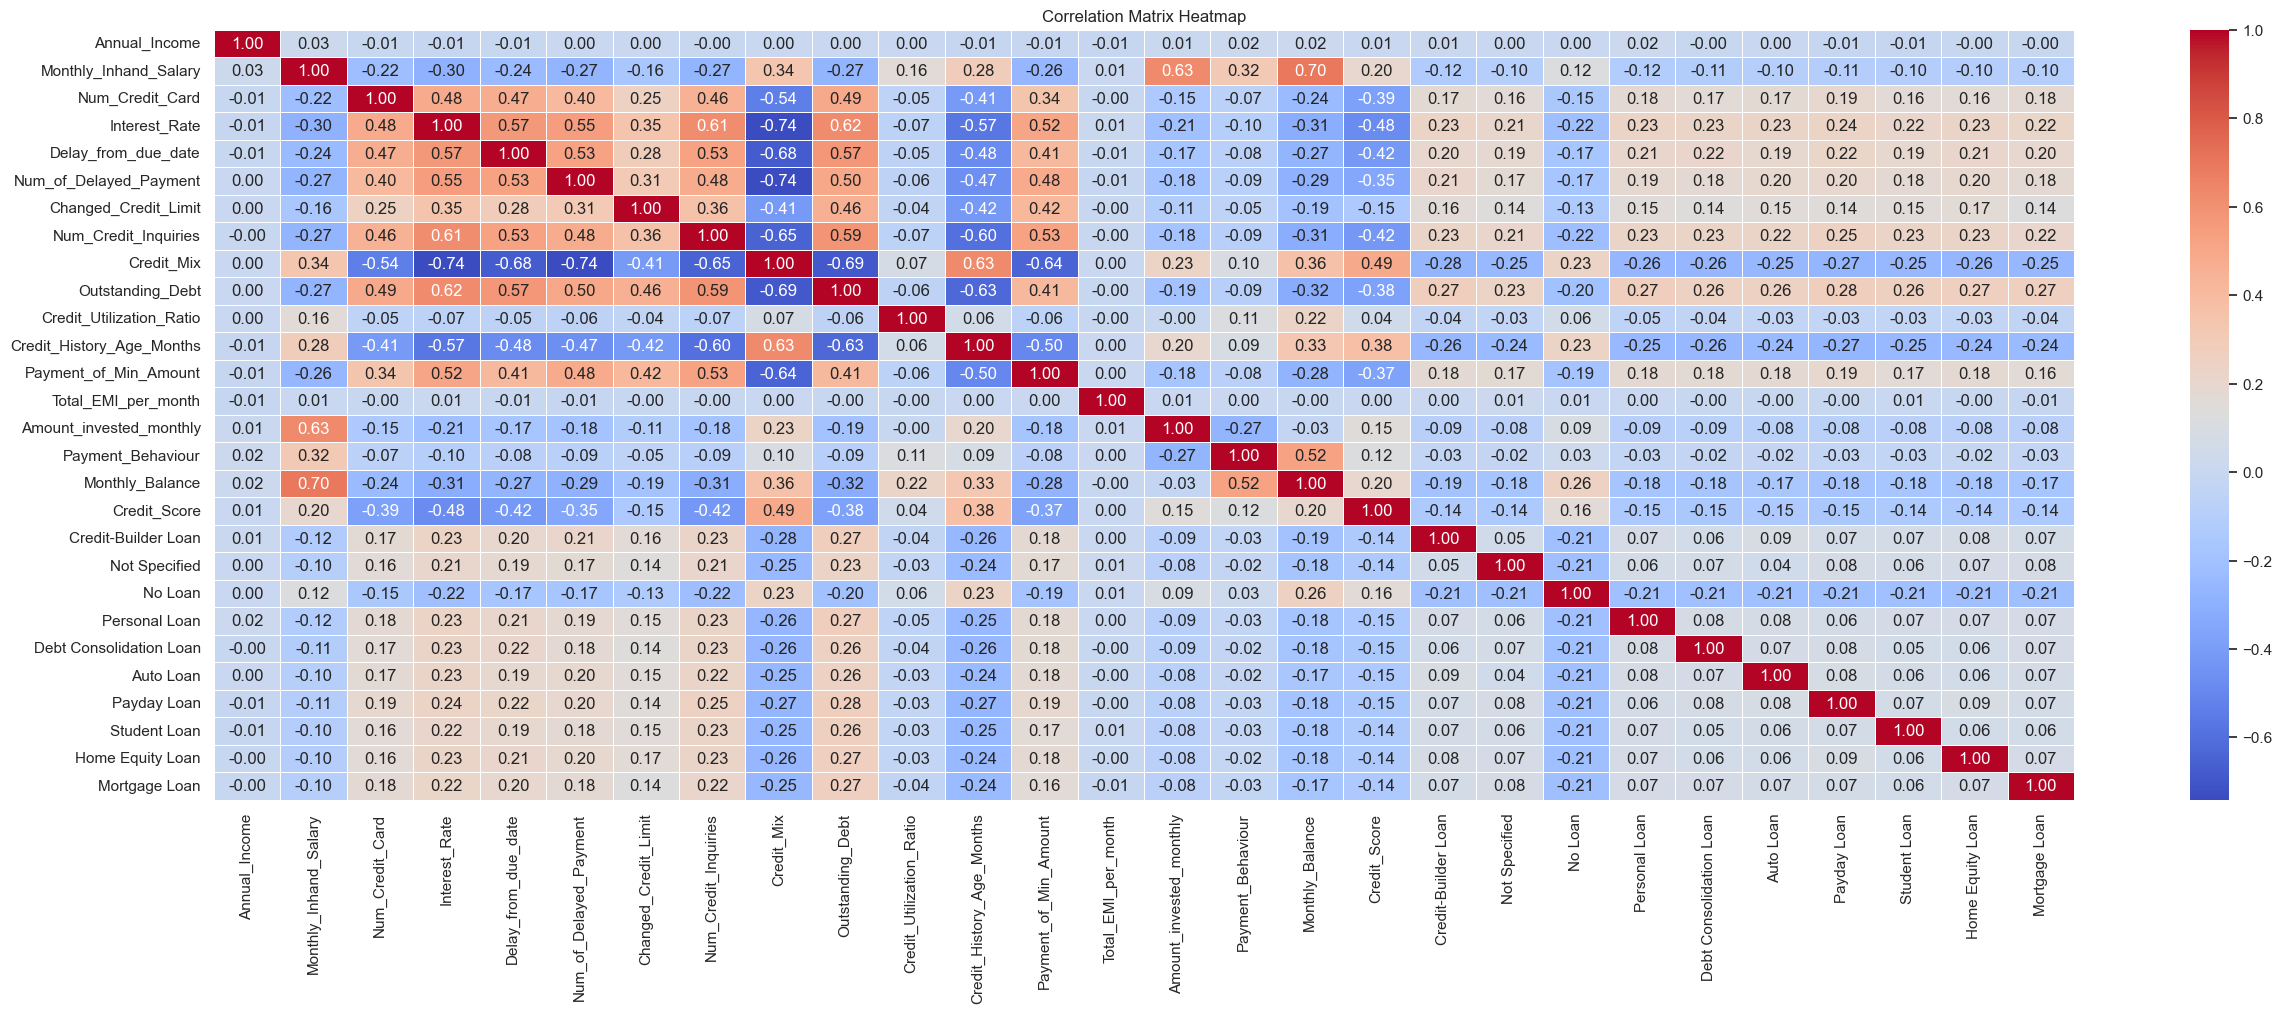

In [208]:
# Correlation matrix

corr_matrix = df.corr()
plt.figure(figsize=(30, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.6)

plt.title('Correlation Matrix Heatmap')

plt.show()

In [209]:
sorted_features = corr_matrix['Credit_Score'].abs().sort_values(ascending=False)


# 5 most (except credit score) and least correlated features with the absolute values
print("5 Most Correlated Features:")
print(sorted_features.head(6)[1:])

print("\n5 Least Correlated Features:")
print(sorted_features.tail(5))

5 Most Correlated Features:
Credit_Mix              0.491418
Interest_Rate           0.479499
Num_Credit_Inquiries    0.424477
Delay_from_due_date     0.417095
Num_Credit_Card         0.386756
Name: Credit_Score, dtype: float64

5 Least Correlated Features:
Credit-Builder Loan         0.137561
Payment_Behaviour           0.119508
Credit_Utilization_Ratio    0.044687
Annual_Income               0.006764
Total_EMI_per_month         0.004128
Name: Credit_Score, dtype: float64


In [210]:
#Dropping the two features with least correlation
df.drop(['Annual_Income','Total_EMI_per_month'],inplace=True,axis=1)
df

,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit-Builder Loan,Not Specified,No Loan,Personal Loan,Debt Consolidation Loan,Auto Loan,Payday Loan,Student Loan,Home Equity Loan,Mortgage Loan
0,0.183478,0.333333,0.066667,0.104478,0.035714,0.324362,0.037736,1.0,0.120993,0.616109,0.791045,0.0,0.024532,1.0,0.309126,2,0.25,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1,0.183478,0.333333,0.066667,0.044776,0.035714,0.300960,0.037736,1.0,0.120993,0.491632,0.798507,0.0,0.079034,0.0,0.283764,2,0.25,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2,0.183478,0.333333,0.066667,0.044776,0.000000,0.277557,0.037736,1.0,0.120993,0.435844,0.800995,0.0,0.026409,1.0,0.307159,2,0.25,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
3,0.183478,0.333333,0.066667,0.044776,0.142857,0.277557,0.037736,1.0,0.120993,0.420153,0.805970,0.0,0.132958,0.0,0.227071,2,0.25,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
4,0.154889,0.444444,0.040000,0.000000,0.214286,0.197285,0.075472,1.0,0.126481,0.197350,0.509950,0.0,0.049338,0.4,0.276568,1,0.00,0.25,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23924,0.188108,0.333333,0.026667,0.164179,0.250000,0.187924,0.056604,1.0,0.135708,0.574965,0.512438,0.0,0.016217,1.0,0.277124,1,0.00,0.00,0.0,0.00,0.2,0.00,0.0,0.4,0.0,0.2
23925,0.187437,0.333333,0.053333,0.104478,0.428571,0.276621,0.056604,1.0,0.124116,0.634589,0.883085,0.0,0.135982,0.0,0.185913,2,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.2,0.2,0.2
23926,0.187437,0.333333,0.053333,0.104478,0.428571,0.276621,0.056604,1.0,0.124116,0.415621,0.885572,0.0,0.043046,1.0,0.251679,2,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.2,0.2,0.2
23927,0.187437,0.333333,0.053333,0.044776,0.428571,0.276621,0.056604,1.0,0.124116,0.561367,0.890547,0.0,0.130886,0.0,0.191270,2,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.2,0.2,0.2


In [211]:
#train_test_split

X= df.drop(['Credit_Score'],axis=1)
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

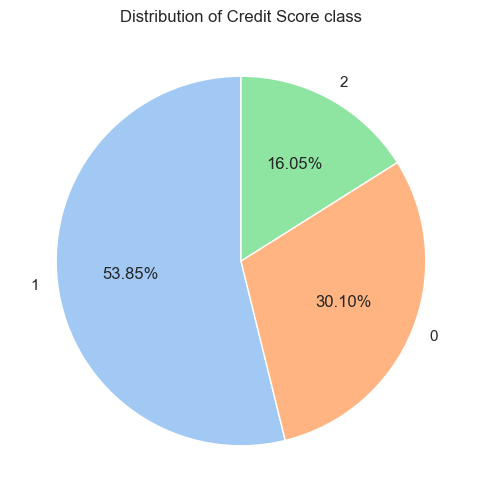

In [212]:
plt.figure(figsize=(8, 6))
y_train.value_counts().plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("pastel"))

plt.title('Distribution of Credit Score class')
plt.ylabel('') 
plt.show()

#the data is significantly skewed towards class 1 "Standard" in its target column which can cause bias that affects the model

In [213]:
#oversampling will be used to rectify the imbalance; duplicate the minority; reduce the majority

sample = SMOTE(sampling_strategy='all', random_state=42)
X_train, y_train = sample.fit_resample(X_train, y_train)
X_test, y_test = sample.fit_resample(X_test, y_test)

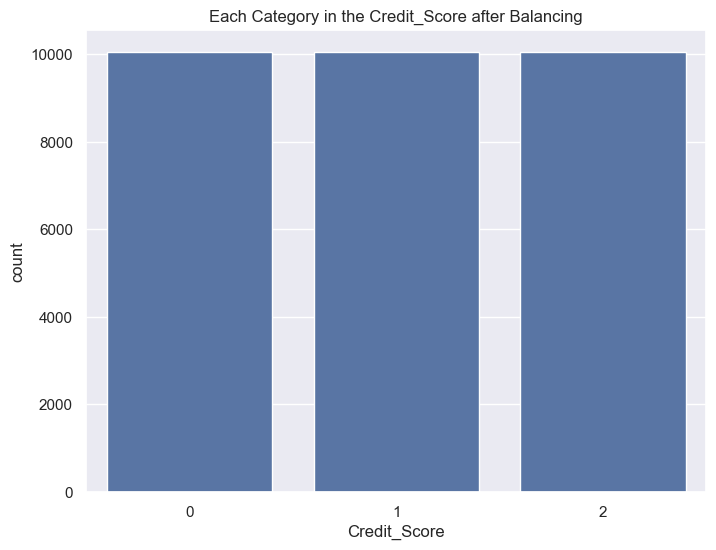

In [214]:
# Balanced set
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x=pd.Series(y_train))

plt.title('Each Category in the Credit_Score after Balancing')
plt.show()

In [37]:
#evaluation before parameter tuning
models = {
    "Logistic Regression": LogisticRegression(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "SVM": SVC()
}


results = {}


for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True) 
    conf_matrix = confusion_matrix(y_test, y_pred)
    

    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": conf_matrix
    }
    

    print(f"Accuracy for {model_name}: {accuracy:.4f}\n")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    print()
    print(f"Confusion Matrix for {model_name}:\n", conf_matrix)
    print()

Evaluating Logistic Regression...


C:\Users\thuht\anaconda3\envs\MLDV\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Logistic Regression: 0.7028

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71      2600
           1       0.65      0.62      0.63      2600
           2       0.72      0.80      0.76      2600

    accuracy                           0.70      7800
   macro avg       0.70      0.70      0.70      7800
weighted avg       0.70      0.70      0.70      7800


Confusion Matrix for Logistic Regression:
 [[1790  432  378]
 [ 558 1607  435]
 [  67  448 2085]]

Evaluating LinearDiscriminantAnalysis...
Accuracy for LinearDiscriminantAnalysis: 0.7033

Classification Report for LinearDiscriminantAnalysis:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      2600
           1       0.65      0.61      0.63      2600
           2       0.71      0.81      0.76      2600

    accuracy                           0.70      7800
   macro avg

C:\Users\thuht\anaconda3\envs\MLDV\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for AdaBoost: 0.7405

Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      2600
           1       0.72      0.66      0.69      2600
           2       0.73      0.85      0.79      2600

    accuracy                           0.74      7800
   macro avg       0.74      0.74      0.74      7800
weighted avg       0.74      0.74      0.74      7800


Confusion Matrix for AdaBoost:
 [[1854  338  408]
 [ 490 1720  390]
 [  72  326 2202]]

Evaluating Bagging...
Accuracy for Bagging: 0.7791

Classification Report for Bagging:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      2600
           1       0.73      0.76      0.74      2600
           2       0.82      0.80      0.81      2600

    accuracy                           0.78      7800
   macro avg       0.78      0.78      0.78      7800
weighted avg       0.78      0.78      0.78     

In [38]:
#paramter tuning for a few models

param_grids = {
    "LR": {
        "solver": ["lbfgs", "liblinear", "saga", "newton-cg"],
        "C": [0.01, 0.1, 1, 10, 100],
        "max_iter": [100, 200],
        "random_state": [42]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski", "chebyshev"],
        "p": [1, 2],  
    },
    "DTC": {
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": [5, 10],
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [5, 10, 50],
        "max_features": ["sqrt"],
        "random_state": [42]
    },
    "GBC": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 4, 5],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "subsample": [0.8, 1.0],
        "random_state": [42]
    },
    "LDA": {
        "solver": ["svd", "lsqr", "eigen"],
        "shrinkage": [None, "auto", 0.1, 0.5],
        "n_components": [None, 1, 2]
    },
    "RF": {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10],
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [5, 10, 50],
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False],
        "random_state": [42]
    },
    "ADB": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.001, 0.01, 0.1],
        "algorithm": ["SAMME", "SAMME.R"],
        "random_state": [42]
    },
    "BG": {
        "n_estimators": [50, 100, 200],
        "max_samples": [0.5, 0.7, 1.0],
        "max_features": [0.5, 0.7, 1.0],
        "random_state": [42]
    },
    "SVM": {
        "C": [1],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    }
}


models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DTC": DecisionTreeClassifier(),
    "GBC": GradientBoostingClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "RF": RandomForestClassifier(),
    "ADB": AdaBoostClassifier(),
    "BG": BaggingClassifier(),
    "SVM": SVC()
}


for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    param_grid = param_grids[model_name]
    
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions = param_grid,
        n_iter=18, 
        scoring='accuracy',  #the dataset is already balanced; balanced_accuracy might be better for imbalanced ones
        cv=5,  
        random_state=42,
        n_jobs=-1 
    )
    
    random_search.fit(X_train, y_train)
    print(f"Best Parameters for {model_name}: {random_search.best_params_}")
    print(f"Best Score for {model_name}: {random_search.best_score_:.4f}")

Tuning LR...
Best Parameters for LR: {'solver': 'newton-cg', 'random_state': 42, 'max_iter': 200, 'C': 0.1}
Best Score for LR: 0.7009
Tuning KNN...
Best Parameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'metric': 'manhattan'}
Best Score for KNN: 0.8569
Tuning DTC...
Best Parameters for DTC: {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Best Score for DTC: 0.7179
Tuning GBC...
Best Parameters for GBC: {'subsample': 0.8, 'random_state': 42, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best Score for GBC: 0.7946
Tuning LDA...


C:\Users\thuht\anaconda3\envs\MLDV\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\thuht\anaconda3\envs\MLDV\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\thuht\anaconda3\envs\MLDV\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\thuht\anaconda3\envs\MLDV\lib\site-packages\sklearn\discriminant_analysis.py", line 629, in fit
    raise NotImplementedEr

Best Parameters for LDA: {'solver': 'lsqr', 'shrinkage': None, 'n_components': 1}
Best Score for LDA: 0.7015
Tuning RF...
Best Parameters for RF: {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Best Score for RF: 0.7589
Tuning ADB...


C:\Users\thuht\anaconda3\envs\MLDV\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters for ADB: {'random_state': 42, 'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
Best Score for ADB: 0.7105
Tuning BG...
Best Parameters for BG: {'random_state': 42, 'n_estimators': 200, 'max_samples': 1.0, 'max_features': 0.7}
Best Score for BG: 0.8324
Tuning SVM...


C:\Users\thuht\anaconda3\envs\MLDV\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=18. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Best Score for SVM: 0.7240


In [215]:
#applying the optimal hyperparameters and trying out the results
models = {
    "Logistic Regression": LogisticRegression(
        solver= 'newton-cg', random_state=42, max_iter = 200, C = 0.1
    ),
    "K-Nearest Neighbors": KNeighborsClassifier(weights= 'distance', p=1, n_neighbors = 3, metric= 'manhattan'),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42, subsample=0.8, n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=5, learning_rate=0.1),
    "Linear Discriminant Analysis" : LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None, n_components=1),
    "Decision Tree": DecisionTreeClassifier(random_state = 42, min_samples_split= 2, min_samples_leaf = 5, max_features = 'sqrt', max_depth = 10, criterion = 'gini'),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state = 42, n_estimators= 50, min_samples_split = 10, min_samples_leaf= 5, max_features= 'sqrt', max_depth= 10, bootstrap=False),
    "AdaBoost": AdaBoostClassifier(random_state = 42, n_estimators= 100, learning_rate = 0.1, algorithm = 'SAMME.R'),
    "Bagging": BaggingClassifier(random_state=42, n_estimators=200, max_samples= 1.0, max_features= 0.7),
    "SVM": SVC(kernel= "rbf", gamma = "scale", C= 1)
}


results = {}


for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True) 
    conf_matrix = confusion_matrix(y_test, y_pred)
    

    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": conf_matrix
    }
    

    print(f"Accuracy for {model_name}: {accuracy:.4f}\n")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    print()
    print(f"Confusion Matrix for {model_name}:\n", conf_matrix)
    print()

Evaluating Logistic Regression...
Accuracy for Logistic Regression: 0.7017

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71      2600
           1       0.64      0.61      0.63      2600
           2       0.72      0.80      0.76      2600

    accuracy                           0.70      7800
   macro avg       0.70      0.70      0.70      7800
weighted avg       0.70      0.70      0.70      7800


Confusion Matrix for Logistic Regression:
 [[1797  423  380]
 [ 574 1589  437]
 [  58  455 2087]]

Evaluating K-Nearest Neighbors...
Accuracy for K-Nearest Neighbors: 0.7267

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      2600
           1       0.63      0.70      0.66      2600
           2       0.78      0.74      0.76      2600

    accuracy                           0.73      7800

C:\Users\thuht\anaconda3\envs\MLDV\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for AdaBoost: 0.7212

Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74      2600
           1       0.68      0.63      0.65      2600
           2       0.72      0.81      0.76      2600

    accuracy                           0.72      7800
   macro avg       0.72      0.72      0.72      7800
weighted avg       0.72      0.72      0.72      7800


Confusion Matrix for AdaBoost:
 [[1889  330  381]
 [ 546 1626  428]
 [  50  440 2110]]

Evaluating Bagging...
Accuracy for Bagging: 0.8162

Classification Report for Bagging:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      2600
           1       0.78      0.79      0.78      2600
           2       0.83      0.87      0.85      2600

    accuracy                           0.82      7800
   macro avg       0.82      0.82      0.82      7800
weighted avg       0.82      0.82      0.82     

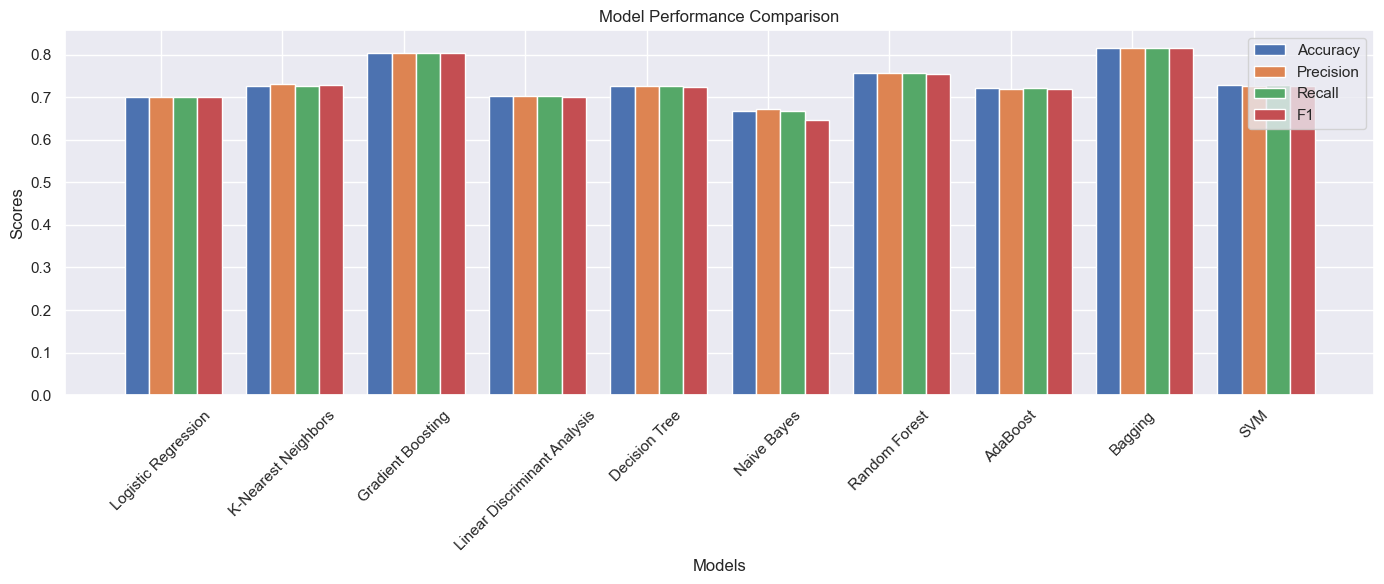

In [216]:
#Visualizing the model performances

model_names = list(results.keys())
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Extract metrics from results
for model_name, metrics in results.items():
    accuracy_scores.append(metrics["Accuracy"])
    precision_scores.append(metrics["Classification Report"]["weighted avg"]["precision"])
    recall_scores.append(metrics["Classification Report"]["weighted avg"]["recall"])
    f1_scores.append(metrics["Classification Report"]["weighted avg"]["f1-score"])


num_models = len(model_names)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Bar width and positions
bar_width = 0.2
bar_positions = np.arange(num_models)

# Plot bars for each metric
plt.bar(bar_positions - bar_width, accuracy_scores, width=bar_width, label="Accuracy")
plt.bar(bar_positions, precision_scores, width=bar_width, label="Precision")
plt.bar(bar_positions + bar_width, recall_scores, width=bar_width, label="Recall")
plt.bar(bar_positions + 2 * bar_width, f1_scores, width=bar_width, label="F1")

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.xticks(bar_positions, model_names, rotation=45)
plt.legend()


plt.tight_layout()
plt.show()


#based on the performances, i will be using BaggingClassifier as the main model

In [218]:
#use 5 instead for random state as it gives out better accuracy score
model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), 
                          random_state=5, n_estimators=200, max_samples=1.0, max_features=0.7)
model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                  max_features=0.7, n_estimators=200, random_state=5)

In [219]:
y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[2014  246  340]
 [ 579 1604  417]
 [  51  443 2106]]

Accuracy: 0.7338461538461538

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2600
           1       0.70      0.62      0.66      2600
           2       0.74      0.81      0.77      2600

    accuracy                           0.73      7800
   macro avg       0.73      0.73      0.73      7800
weighted avg       0.73      0.73      0.73      7800



In [220]:
joblib.dump(model, "model_Credit.pkl")

['model_Credit.pkl']